In [1]:
import sympy as sp
import numpy as np

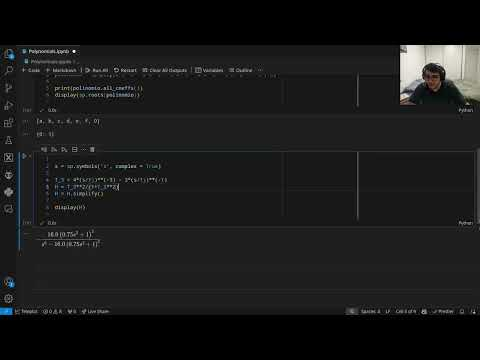

In [2]:

from IPython.display import YouTubeVideo

YouTubeVideo('qaXkpf3VUwo', width=800, height=450)

In [1]:
%%html

<iframe width="560" height="315" src="https://www.youtube.com/embed/2TT1EKPV_hc" frameborder="0" allowfullscreen></iframe>

## Polinomios

In [3]:
#Poly permite definir un polinomio
x= sp.symbols('x')
m = sp.symbols('m')                  #Se pudo especificar el dominio: real o complejo
polinomio = x**2 - m
display(polinomio)
polinomio = sp.poly(x**2 - m , x)    #Importante la variable.
display(polinomio)

-m + x**2

Poly(x**2 - m, x, domain='ZZ[m]')

In [4]:
#Encontramos el grado del polinomio
degree = sp.degree(polinomio)
print(degree)
roots = sp.roots(polinomio)
print(roots)     # Roots devuelve un diccionario donde la salida es {raíz_1: multiplicidad_1, ..., raíz_n: multiplicidad_n}

2
{-sqrt(m): 1, sqrt(m): 1}


In [5]:
#Definimos polinomio de grado 6 y obtenemos la raíces

#nroots: es para numericamente  obtener las raíces
#roots: es para obtener las raíces simbolicamente

a,b,c,d,e,f,g =   sp.symbols('a,b,c,d,e,f,g', real = True)
polinomio = sp.poly(a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x   , x)
print(polinomio.all_coeffs())
roots = sp.roots(polinomio)

#Al no existir la resolvente de orden 6, no se puede encontrar una expresión algebraica para las raíces.
#Algunos polinomios de orden n pueden llegar a resolver debido a que hay cierta técnicas que lo permiten, pero no son generales.
#citar paper que no existe la resolvente
print(roots)




[a, b, c, d, e, f, 0]
{0: 1}


In [6]:
#Para obtener los coeficientes de polinomio se usa coeffs.

display(polinomio.all_coeffs())

[a, b, c, d, e, f, 0]

In [7]:

#Ahora analicemos una función transferencia low-pass normalizado y encontremos los polos.
s = sp.symbols('s', complex = True)

T_3 = 4*(s/1j)**(-3) - 3*(s/1j)**(-1)
H = T_3**2/(1+T_3**2)
H = H.simplify()

display(H)

num, den = sp.fraction(H)       #coef = [numerador, denominador]
#Importante acordarse que debemos aclarar la variable.en esta caso es 's'
num = sp.poly(num, s)   #obtenemos numerador
display(num)
den = sp.poly(den, s)   #obtenemos denominador
display(den)




-16.0*(0.75*s**2 + 1)**2/(s**6 - 16.0*(0.75*s**2 + 1)**2)

Poly(-9.0*s**4 - 24.0*s**2 - 16.0, s, domain='RR')

Poly(1.0*s**6 - 9.0*s**4 - 24.0*s**2 - 16.0, s, domain='RR')

In [8]:
#Conseguimos los polos y ceros obteniendo las raíces del denominador y numerador respectivamente
#Aclaración: existe la función nroots en Sympy, pero es recomendable no usarla
#Entonces se utiliza una nueva librería llamanda Numpy para el cálculo numerico. También se podría usar Scipy

print(den.all_coeffs())
polos = np.roots(den.all_coeffs())
ceros = np.roots(num.all_coeffs())


print(polos)
polos_real = np.real(polos) #Obtenemos la parte real de los polos
print(polos_real)
polos_img =np.imag(polos)  #Obtenemos la parte imaginaria de los polos
print(polos_img)


[1.00000000000000, 0.0, -9.00000000000000, 0.0, -24.0000000000000, 0.0, -16.0000000000000]
[-3.3553014+0.j          3.3553014+0.j         -0.1776507+1.07730381j
 -0.1776507-1.07730381j  0.1776507+1.07730381j  0.1776507-1.07730381j]
[-3.3553014  3.3553014 -0.1776507 -0.1776507  0.1776507  0.1776507]
[ 0.          0.          1.07730381 -1.07730381  1.07730381 -1.07730381]


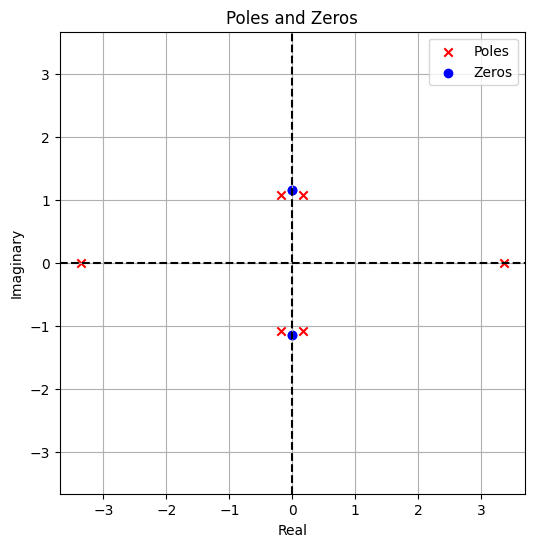

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.scatter(np.real(polos), np.imag(polos), marker='x', color='red', label='Poles')
plt.scatter(np.real(ceros), np.imag(ceros), marker='o', color='blue', label='Zeros')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Poles and Zeros')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
